In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from load_data import *

In [39]:
# P(Coupling)
# P(Coupling/Volcano)

im_paleo = [im_dandak, im_jhumar, im_cook,  im_shi_2018, im_shi_2017, im_shi_2014, \
           im_sano_2017, im_borgaonkar_2010, im_yadava_2004, im_feng_2013]

im_paleo_yy = [yy_dandak, yy_jhumar, yy_cook, yy_shi_2018, yy_shi_2017, yy_shi_2014, \
              yy_sano_2017, yy_borgaonkar_2010, yy_yadava_2004, yy_feng_2013]

im_paleo_volc = [volc_dandak, volc_jhumar, volc_cook,   volc_shi_2018, volc_shi_2017, \
                volc_shi_2014, volc_sano_2017, volc_borgaonkar_2010, volc_yadava_2004, volc_feng_2013]
im_event_series = [False, False, False, False, False, False, False, False, False, False]

nino3_paleo = [nino3_li_2011, nino3_li_2013, nino3_mann_2009, nino3_moy_2002, nino3_arrigo_2005, \
              nino3_mcgregor_2010, nino3_stahle_1998, nino3_emily_geay_2012, nino3_cook_2008, \
              nino3_gergis_2009, nino3_yan_2011, nino3_datwyler_2019, nino3_wilson_2010, \
              nino3_braganza_2009]

nino3_paleo_yy = [yy_li_2011, yy_li_2013, yy_mann_2009, yy_moy_2002, yy_arrigo_2005, yy_mcgregor_2010, \
                 yy_stahle_1998, yy_emily_geay_2012, yy_cook_2008, yy_gergis_2009, yy_yan_2011, yy_datwyler_2019, \
                 yy_wilson_2010, yy_braganza_2009]

nino3_paleo_volc = [volc_li_2011, volc_li_2013, volc_mann_2009, volc_moy_2002, volc_arrigo_2005, \
                   volc_mcgregor_2010, volc_stahle_1998, volc_emily_geay_2012, volc_cook_2008, \
                   volc_gergis_2009, volc_yan_2011, volc_datwyler_2019, volc_wilson_2010, \
                   volc_braganza_2009]

nino3_event_series = [False, False, False, False, False, False, False, False, False, True, False, False, False, False]

print(im_paleo[0].shape[0])
print(im_dandak.shape[0])
#print(yy_mcgregor_2010)
dvolc = np.genfromtxt('sigl_volc.txt', delimiter=",")
dvolc_yy = dvolc[:,0]
dvolc_mag = dvolc[:,1]

937
937


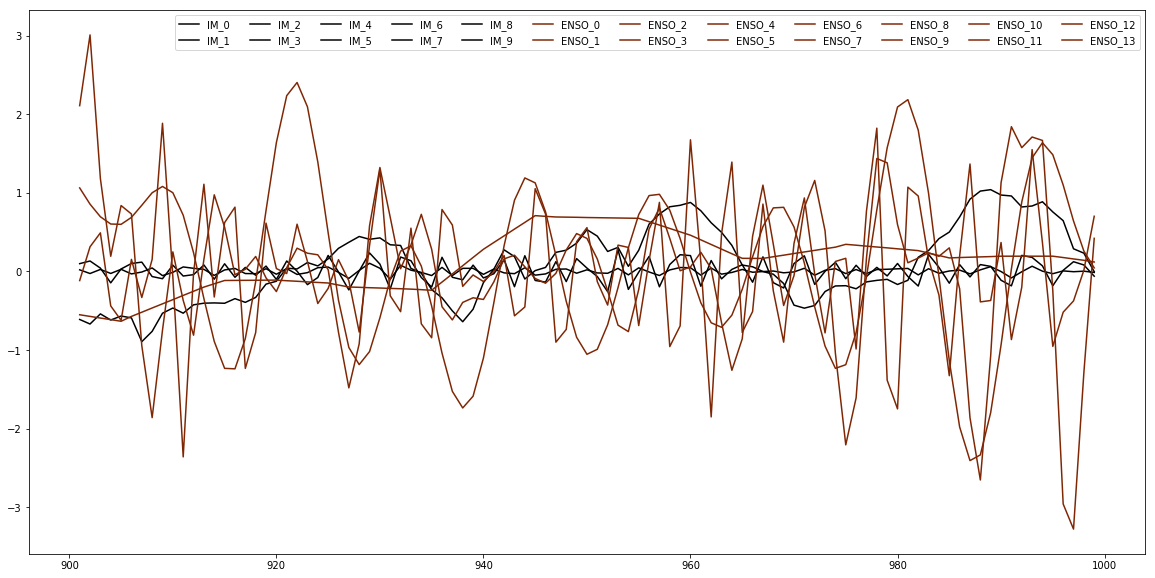

In [40]:
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('Greys')
N = 10
for i in range(len(im_paleo)):
    idx = np.logical_and(im_paleo_yy[i]>900,im_paleo_yy[i]<1000)
    dummy_yy = im_paleo_yy[i][idx]
    dummy = im_paleo[i][idx]
    color = cmap(float(i)+10)
    plt.plot(dummy_yy, dummy, label="IM_"+str(i), c=color)
cmap = plt.get_cmap('Oranges')
for j in range(len(nino3_paleo)):
    idx = np.logical_and(nino3_paleo_yy[j]>900,nino3_paleo_yy[j]<1000)
    dummy_yy = nino3_paleo_yy[j][idx]
    dummy = nino3_paleo[j][idx]
    color = cmap(float(j)+10)
    plt.plot(dummy_yy, dummy,label="ENSO_"+str(j), c=color)
plt.legend(ncol=12)

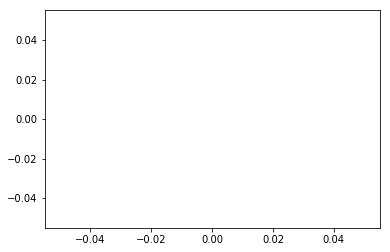

In [41]:
i=3
idx = np.logical_and(im_paleo_yy[i]>900,im_paleo_yy[i]<1000)
dummy_yy = im_paleo_yy[i][idx]
dummy = im_paleo[i][idx]
color = cmap(float(i)+10)
plt.plot(dummy_yy, dummy, label="IM_"+str(i), c=color)

In [42]:
def find_nearest(array, value):
    #idx = np.where(array == value)
    idx = (np.abs(array - value)).argmin()
    #print(idx)
    return idx
win_yy_start = 1785
win_yy_end = 1845
corr=[]
im_example = []
nino3_example = []
from scipy.stats import pearsonr
for im_i in range(len(im_paleo)):
    for nino3_j in range(len(nino3_paleo)):
        #if (nino3_paleo_yy[nino3_j][0] < im_paleo_yy[im_i][-1]) and (im_paleo_yy[im_i][0] < nino3_paleo_yy[nino3_j][-1]):
        if (nino3_paleo_yy[nino3_j][0] < im_paleo_yy[im_i][-1]) and (im_paleo_yy[im_i][0] < nino3_paleo_yy[nino3_j][-1]):
            #if ((nino3_paleo_yy[nino3_j][0] < 1000) and (im_paleo_yy[im_i][0] < 1000) and (nino3_paleo_yy[nino3_j][-1] > 900) and (im_paleo_yy[im_i][-1] < 900)):
            
            yy_start = max(im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
            yy_end = min(im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            #yy_start = 900
            #yy_end  = 1000
            

            #print(yy_start, im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
            #print(yy_end, im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            j=0
            if yy_start>=win_yy_end or yy_end<=win_yy_start:
                continue
            #print(yy_start, im_paleo_yy[im_i][0], nino3_paleo_yy[nino3_j][0])
            #print(yy_end, im_paleo_yy[im_i][-1], nino3_paleo_yy[nino3_j][-1])
            
            im_idx_start = find_nearest(im_paleo_yy[im_i], win_yy_start)
            im_idx_end = find_nearest(im_paleo_yy[im_i], win_yy_end)
            nino3_idx_start = find_nearest(nino3_paleo_yy[nino3_j], win_yy_start)
            nino3_idx_end = find_nearest(nino3_paleo_yy[nino3_j], win_yy_end)
            
            yy_start_ex = max(im_paleo_yy[im_i][im_idx_start], nino3_paleo_yy[nino3_j][nino3_idx_start])
            yy_end_ex = min(im_paleo_yy[im_i][im_idx_end], nino3_paleo_yy[nino3_j][nino3_idx_end])
            
            im_dummy = np.zeros((int(yy_end_ex)-int(yy_start_ex)+1))
            nino3_dummy = np.zeros((int(yy_end_ex)-int(yy_start_ex)+1))
            volc_dummy = np.zeros((int(yy_end_ex)-int(yy_start_ex)+1))
            yy_dummy = np.arange(int(yy_start_ex),int(yy_end_ex)+1)

            #print(nino3_paleo_yy[nino3_j])
            #print(yy_start_ex, yy_end_ex)
            #print(nino3_idx_start)
            #print(nino3_paleo_yy[nino3_j][nino3_idx_start])
            #print(im_paleo_yy[im_i][im_idx_start])
            #print(im_paleo_yy[im_i][im_idx_end])
            #print(nino3_paleo_yy[nino3_j][nino3_idx_start])
            #print(nino3_paleo_yy[nino3_j][nino3_idx_end])
            
            #print(im_i, nino3_j)
            for i in range(int(yy_start_ex),int(yy_end_ex)+1):
                #print(im_i)
                im_idx = np.where(im_paleo_yy[im_i] == i)[0][0]
                im_dummy[j] = im_paleo[im_i][im_idx]
                volc_dummy[j] = im_paleo_volc[im_i][im_idx]
    
                nino3_idx = np.where(nino3_paleo_yy[nino3_j] == i)[0][0]
            #print(nino3_idx)
                nino3_dummy[j] = nino3_paleo[nino3_j][nino3_idx]
                j = j + 1
            #print(np.corrcoef(im_dummy, nino3_dummy)[0,1])
            print(pearsonr(im_dummy, nino3_dummy))
            corr.append([pearsonr(im_dummy, nino3_dummy)])
            im_example.append(im_dummy)
            nino3_example.append(nino3_dummy)

(0.03819114523343679, 0.7701198140025577)
(0.03370250897194616, 0.7965206037698751)
(-0.19570988602465073, 0.1306406622380467)
(-0.0025475384053603592, 0.9844539561332701)
(0.041732631477328294, 0.7494699232503669)
(-0.04172325673985568, 0.7495243627937652)
(0.00412612774990842, 0.9748233259449245)
(-0.06587230246156414, 0.6139915184214819)
(0.008600539471209038, 0.9475498765641042)
(0.09365334529964188, 0.4728165429854768)
(0.061717385562314174, 0.6365649887961362)
(0.05771013447932189, 0.6586524487946844)
(-0.08199689620310527, 0.5298554639009929)
(-0.0366513765358109, 0.7791487029705699)
(0.004299228080880661, 0.973767471305326)
(-0.2972589199238546, 0.019992157612270446)
(0.22878852626682175, 0.07614020339953696)
(-0.012022543733041771, 0.9267299914031775)
(-0.2050740969142323, 0.11286498912981816)
(-0.15307879568126032, 0.2388737194085991)
(-0.11686115027665804, 0.3697663642597261)
(-0.13092117768212505, 0.3145549900832002)
(-0.25702308454385236, 0.04554171741668501)
(-0.224162640

In [43]:
corr = np.asarray(corr)

In [44]:
dummy=[]
for i in range(corr.shape[0]):
    if corr[i,0,1]>0.05:
        continue
    dummy.append(corr[i,0,0])

In [45]:
print(np.percentile(dummy,50))
print(np.mean(dummy))

-0.3475104270361586
-0.24168430027771515


/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


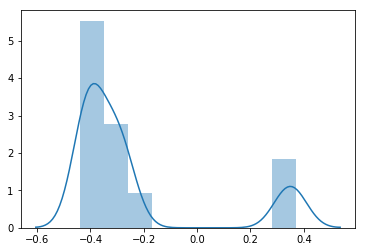

In [46]:
import seaborn as sns
sns.distplot(dummy)

In [47]:
def check_ele_present(li, arr):
    for i in range(len(li)):
        if (li[i]==arr).all():
            return True
    return False

im_example_new = []
for li in im_example:
        if not check_ele_present(im_example_new, li):
            im_example_new.append(li)

nino3_example_new = []
for li in nino3_example:
        if not check_ele_present(nino3_example_new, li):
            nino3_example_new.append(li)


Text(1800, 2.5, 'Mean Corr Coef = -0.27 at 95% sig')

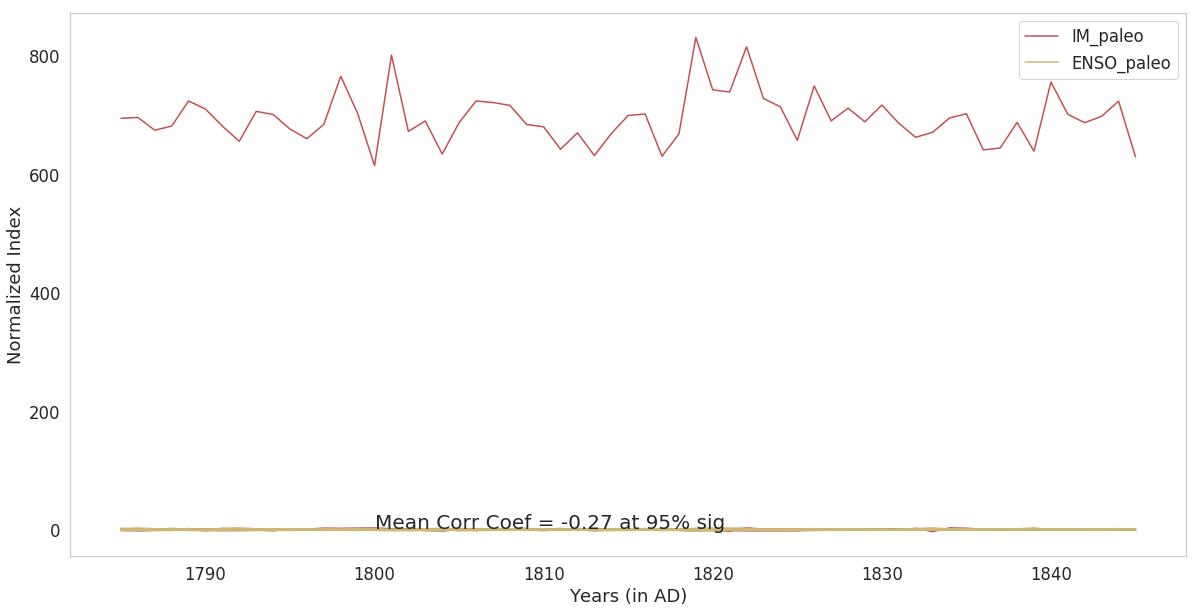

In [48]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(20,10))
plt.plot(yy_dummy, im_example_new[0], color='r', label='IM_paleo')
plt.plot(yy_dummy, im_example_new[1], color='r')
plt.plot(yy_dummy, im_example_new[2], color='r')
for i in range(4,len(im_example_new)):
    plt.plot(yy_dummy, im_example_new[i], color='r')
plt.plot(yy_dummy, nino3_example_new[0], color='y', label='ENSO_paleo')
for i in range(1,len(nino3_example_new)):
    plt.plot(yy_dummy, nino3_example_new[i], color='y')
plt.grid()
plt.legend()
plt.xlabel('Years (in AD)')
plt.ylabel('Normalized Index')
plt.text(1800, 2.5, 'Mean Corr Coef = -0.27 at 95% sig', fontsize=20)

In [18]:
len(im_example_new)

9

In [21]:
im_example_new

[array([ 0.16025418,  0.03494915, -0.38647078, -1.299042  , -0.94983098,
        -1.55784931, -1.82612795, -1.41018179, -0.83346135, -0.53599024,
         0.01871372,  0.14330185, -1.38377665, -1.08666164, -0.48427569,
        -0.17265967,  0.90779154,  2.55532534,  2.17236603,  2.59409618,
         2.73210875,  1.60528709,  0.5976672 ,  0.61576218,  0.43476224,
        -0.21627047, -0.29411606,  0.48590525,  0.92419084,  1.13577775,
         1.27449018,  1.38398513,  1.29330113,  1.18357149,  0.7907041 ,
         0.53463162,  0.81717569,  0.78988544,  0.03417174, -0.62124027,
        -1.1777537 , -1.64304189, -2.04942103, -2.09007818, -2.04167392,
        -1.69755503, -1.32714487, -0.9659212 , -0.57157108, -0.01329076,
         0.04907074, -0.62773128, -0.85519748, -0.63201969, -0.71320318,
        -0.92771318, -0.66353391, -0.28261041, -0.14439224,  0.007028  ,
         0.31695464]),
 array([-0.48107694,  0.16256265,  0.23758812,  0.31952384,  1.07668882,
         1.96218684, -0.0092